In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

warnings.simplefilter(action="ignore", category=Warning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Analysis

In [2]:
dataframe = pd.read_csv("datasets/train.csv")
dataframe_test = pd.read_csv("datasets/test.csv")

all_data = [dataframe, dataframe_test]

In [3]:
# Dataset Overview

In [4]:
print("#"*20, " Shape ", "#"*20)
print(dataframe.shape)
print("#"*20, " Types ", "#"*20)
print(dataframe.dtypes)
print("#"*20, " Head ", "#"*20)
print(dataframe.head())
print("#"*20, " Tail ", "#"*20)
print(dataframe.tail())
print("#"*20, " NA ", "#"*20)
print(dataframe.isnull().sum())
print("#"*20, " Quantiles" , "#"*20)
print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

####################  Shape  ####################
(891, 12)
####################  Types  ####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
####################  Head  ####################
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex    Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1   
2                             Heikkinen, Miss. Laina  female 26.000      0   
3       Futrelle, Mrs.

In [5]:
# Storing Variables
cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes != "O"]
    
cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and dataframe[col].dtypes == "O"]
    
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
# num_cols
num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]
    
cols = [dataframe.columns]
print(f'Observations: {dataframe.shape[0]}')
print(f'Variables: {dataframe.shape[1]}')
print(f'cat_cols: {len(cat_cols)} col names: {cat_cols}')
print(f'num_cols: {len(num_cols)} col names: {num_cols}')
print(f'cat_but_car: {len(cat_but_car)} col names: {cat_but_car}')
print(f'num_but_cat: {len(num_but_cat)} col names: {num_but_cat}')

Observations: 891
Variables: 12
cat_cols: 6 col names: ['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']
num_cols: 3 col names: ['PassengerId', 'Age', 'Fare']
cat_but_car: 3 col names: ['Name', 'Ticket', 'Cabin']
num_but_cat: 4 col names: ['Survived', 'Pclass', 'SibSp', 'Parch']


In [6]:
# Categorical Variable Analysis

In [7]:
for col_name in dataframe[cat_cols]:
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#"*20)

        Sex  Ratio
male    577 64.759
female  314 35.241
####################
   Embarked  Ratio
S       644 72.278
C       168 18.855
Q        77  8.642
####################
   Survived  Ratio
0       549 61.616
1       342 38.384
####################
   Pclass  Ratio
3     491 55.107
1     216 24.242
2     184 20.651
####################
   SibSp  Ratio
0    608 68.238
1    209 23.457
2     28  3.143
4     18  2.020
3     16  1.796
8      7  0.786
5      5  0.561
####################
   Parch  Ratio
0    678 76.094
1    118 13.244
2     80  8.979
5      5  0.561
3      5  0.561
4      4  0.449
6      1  0.112
####################


In [8]:
# Numerical values overview

In [9]:
dataframe[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [10]:
# Detailed Numerical Value Analysis

              count    mean     std   min     5%    10%     20%     30%  \
PassengerId 891.000 446.000 257.354 1.000 45.500 90.000 179.000 268.000   

                40%     50%     60%     70%     90%     95%     99%     max  
PassengerId 357.000 446.000 535.000 624.000 802.000 846.500 882.100 891.000  


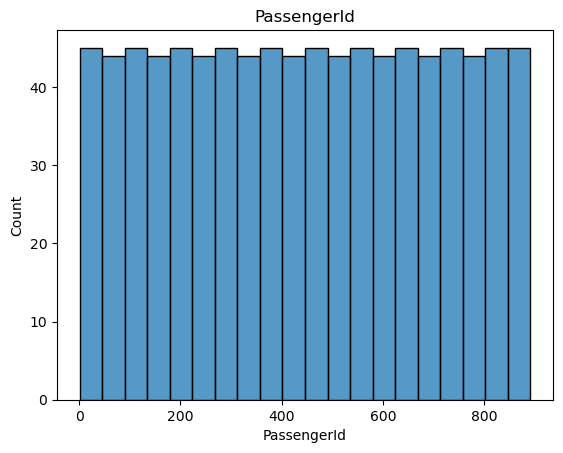

      count   mean    std   min    5%    10%    20%    30%    40%    50%  \
Age 714.000 29.699 14.526 0.420 4.000 14.000 19.000 22.000 25.000 28.000   

       60%    70%    90%    95%    99%    max  
Age 31.800 36.000 50.000 56.000 65.870 80.000  


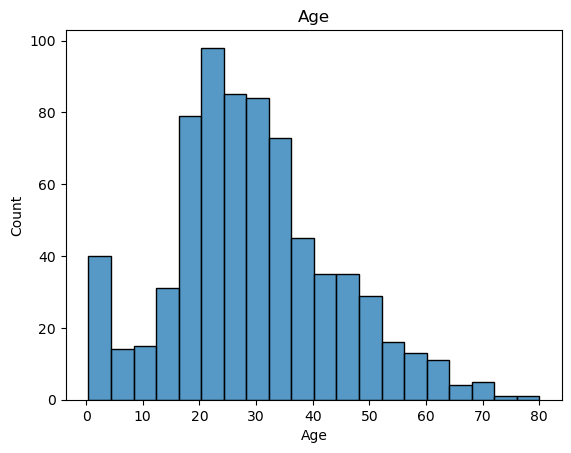

       count   mean    std   min    5%   10%   20%   30%    40%    50%    60%  \
Fare 891.000 32.204 49.693 0.000 7.225 7.550 7.854 8.050 10.500 14.454 21.679   

        70%    90%     95%     99%     max  
Fare 27.000 77.958 112.079 249.006 512.329  


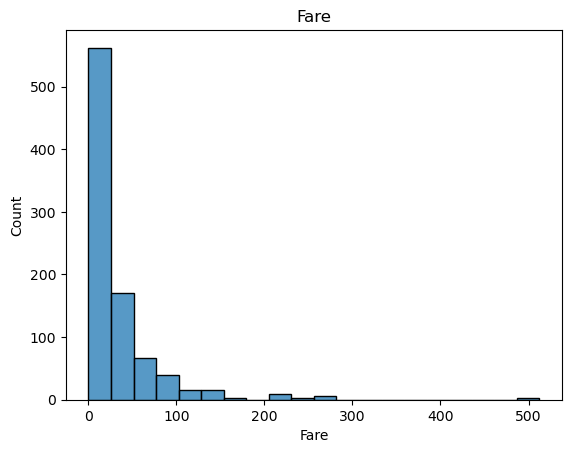

In [11]:
for col_name in dataframe[num_cols]:
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.90, 0.95, 0.99]
    print(pd.DataFrame(dataframe[col_name].describe(quantiles)).T)
    
    g = sns.histplot(x=dataframe[col_name],
                        data=dataframe,
                        bins=20)
    g.set_title(col_name)
    g.set(xlabel=col_name)
    plt.show()

In [12]:
# Outlier Analysis

In [13]:
q1 = 0.01
q3 = 0.99
for col_name in dataframe[num_cols]:
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + interquartile_range * 1.5
    low_limit = quartile1 - interquartile_range * 1.5
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        print({col_name}, ": Outlier var")
    else:
        print({col_name}, ": Outlier yok")

{'PassengerId'} : Outlier yok
{'Age'} : Outlier yok
{'Fare'} : Outlier yok


In [14]:
# Target Variable Analysis

In [15]:
# Averages of numerical variables accoring to target
for numerical_col in num_cols:    
    print(dataframe.groupby("Survived").agg({numerical_col: "mean"}), end="\n\n\n")
print("#"*50, "\n\n")
for categorical_col in cat_cols:
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)["Survived"].mean()}), end="\n\n\n")

          PassengerId
Survived             
0             447.016
1             444.368


            Age
Survived       
0        30.626
1        28.344


           Fare
Survived       
0        22.118
1        48.395


################################################## 


        TARGET_MEAN
Sex                
female        0.742
male          0.189


          TARGET_MEAN
Embarked             
C               0.554
Q               0.390
S               0.337


          TARGET_MEAN
Survived             
0               0.000
1               1.000


        TARGET_MEAN
Pclass             
1             0.630
2             0.473
3             0.242


       TARGET_MEAN
SibSp             
0            0.345
1            0.536
2            0.464
3            0.250
4            0.167
5            0.000
8            0.000


       TARGET_MEAN
Parch             
0            0.344
1            0.551
2            0.500
3            0.600
4            0.000
5            0.200
6            

In [16]:
# Correlation Overview

<Axes: >

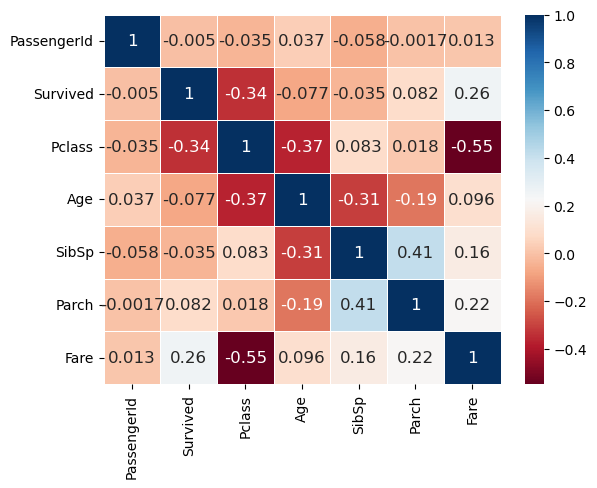

In [17]:
sns.heatmap(dataframe.corr(),
                     annot=True,
                     linewidths=0.5,
                     annot_kws={"size": 12},
                     linecolor="w",
                     cmap="RdBu")

# Feature Engineering

In [18]:
for data in all_data:
    print(data.isnull().sum())
    print("\n\n")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64





In [19]:
# Filling Null Values

In [20]:
dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0], inplace = True)
dataframe_test['Fare'].fillna(dataframe_test['Fare'].median(), inplace = True)

dataframe['Age'].fillna(dataframe['Age'].median(), inplace = True)
dataframe_test['Age'].fillna(dataframe_test['Age'].median(), inplace = True)

In [21]:
# Creating New Features
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    dataset["Title"] = dataset["Name"].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
    
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [22]:
dataframe.groupby("Title").agg({"Title":"count"})

,Title
Title,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


In [23]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess', 'the Countless','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Deleting columns that not include information
    dataset.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace = True)

In [24]:
# Storing Variables - 2

cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes != "O"]
    
cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and dataframe[col].dtypes == "O"]
    
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
# num_cols
num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]
    
cols = [dataframe.columns]
print(f'Observations: {dataframe.shape[0]}')
print(f'Variables: {dataframe.shape[1]}')
print(f'cat_cols: {len(cat_cols)} col names: {cat_cols}')
print(f'num_cols: {len(num_cols)} col names: {num_cols}')
print(f'cat_but_car: {len(cat_but_car)} col names: {cat_but_car}')
print(f'num_but_cat: {len(num_but_cat)} col names: {num_but_cat}')

Observations: 891
Variables: 12
cat_cols: 10 col names: ['Sex', 'Embarked', 'Title', 'Survived', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'Age_bin', 'Fare_bin']
num_cols: 2 col names: ['Age', 'Fare']
cat_but_car: 0 col names: []
num_but_cat: 7 col names: ['Survived', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'Age_bin', 'Fare_bin']


In [25]:
cat_cols = [col for col in cat_cols if "Survived" not in col]

In [26]:
num_cols

['Age', 'Fare']

In [27]:
dataframe.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,0,3,male,22.000,1,0,7.250,S,2,Mr,Adult,Low_fare


In [28]:
# Deciding to Is Parch Variable really a categorical?

In [29]:
dataframe_test.groupby("Parch").agg({"Parch":"count"})

,Parch
Parch,
0,324
1,52
2,33
3,3
4,2
5,1
6,1
9,2


In [30]:
dataframe.groupby("Parch").agg({"Parch":"count"})

,Parch
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


In [31]:
cat_cols = [col for col in cat_cols if "Parch" not in col]
cat_cols

['Sex',
 'Embarked',
 'Title',
 'Pclass',
 'SibSp',
 'FamilySize',
 'Age_bin',
 'Fare_bin']

In [32]:
# Encoding for categorical Columns

cat_cols = ['Sex','Embarked','Title','Pclass','SibSp','FamilySize','Age_bin','Fare_bin']

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols, drop_first=drop_first)
    return dataframe

dataframe = one_hot_encoder(dataframe, cat_cols, drop_first=True)

y = dataframe["Survived"]
X = dataframe.drop(["Survived"], axis=1)

In [33]:
X.head()

,Age,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Fare_bin_median_fare,Fare_bin_Average_fare,Fare_bin_high_fare
0,22.000,0,7.250,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,38.000,0,71.283,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,26.000,0,7.925,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,35.000,0,53.100,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,35.000,0,8.050,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


# Machine Learning

In [34]:
# Base model

In [35]:
print("Base model...")
cv_results = cross_validate(RandomForestClassifier(random_state=8), X, y, cv=10, scoring="accuracy")
print("accuracy: ", {round(cv_results['test_score'].mean(), 4)}, "(RandomForest)")

Base model...
accuracy:  {0.8003} (RandomForest)


In [36]:
# Hyperparameter Optimization

In [37]:
print("Before hyperparameter optimization / accuracy: ", round(cv_results['test_score'].mean(), 4), "(RandomForest)")
rf_params = {
    'bootstrap': [True],
    'max_depth': [9, 8, 7],
    'max_features': [30, 25, 20],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [10, 8, 5],
    'n_estimators': [500, 700]
}    

random_forest = RandomForestClassifier(random_state=78)

gs_best = GridSearchCV(random_forest, rf_params, cv=10, n_jobs=-1, verbose=False).fit(X, y)
final_model = random_forest.set_params(**gs_best.best_params_)

cv_results = cross_validate(random_forest, X, y, cv=10, scoring="accuracy")
print(f"After hyperparameter optimization / accuracy: {round(cv_results['test_score'].mean(), 4)} (RandomForest) ")

Before hyperparameter optimization / accuracy:  0.8003 (RandomForest)
After hyperparameter optimization / accuracy: 0.853 (RandomForest) 


In [38]:
gs_best.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 700}

In [39]:
# Submission

In [40]:
ids = pd.read_csv("datasets/test.csv")
ids = ids["PassengerId"]

In [41]:
cat_cols = ['Sex','Embarked','Title','Pclass','SibSp','FamilySize','Age_bin','Fare_bin']

def one_hot_encoder_test(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols, drop_first=drop_first)
    return dataframe

X_val = one_hot_encoder(dataframe_test, cat_cols, drop_first=True)

In [42]:
final_model.fit(X, y)
predictions = random_forest.predict(X_val)

In [43]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submissionVBT.csv', index=False)